# Analyzing Star Wars Survey Data

## Introduction

In this project, we'll aim to explore and clean exists survey from Star Wars fans using the online tool SurveyMonkey to answer the following question: *does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?.* The data contains 835 total responses, which can be downloaded from their [GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

The data has several columns, including:

- RespondentID - An anonymized ID for the respondent (person taking the survey)
- Gender - The respondent's gender
- Age - The respondent's age
- Household Income - The respondent's income
- Education - The respondent's education level
- Location (Census Region) - The respondent's location
- Have you seen any of the 6 films in the Star Wars franchise? - Has a Yes or No response
- Do you consider yourself to be a fan of the Star Wars film franchise? - Has a Yes or No response

### Summary of results

After analyzing the data, we reached that the episode 5 “The Empire Strikes Back” is the most seen and best ranked episode by most of the respondents. In general, the earlier movies seem to be more popular. 

### Exploring the data

In [1]:
import pandas as pd
# Read in the star_wars dataframe
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
star_wars.head(3)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central


In [2]:
# Review the column names
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

## Cleaning and Transforming the dataset
First, we'll need to remove the invalid rows. For example, RespondentID is supposed to be a unique ID for each respondent, but it's blank in some rows. Let's remove any rows with an invalid RespondentID.

#### Cleaning RespondentID Column

In [3]:
star_wars = star_wars[pd.notnull(star_wars['RespondentID'])]
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


#### Cleaning and Mapping Yes/No Columns
The following columns represent Yes/No questions. They can also be NaN where a respondent chooses not to answer a question:

- Have you seen any of the 6 films in the Star Wars franchise?
- Do you consider yourself to be a fan of the Star Wars film franchise?

We will convert each column to a Boolean having only the values True, False, and NaN in order to make the data a bit easier to analyze.

In [4]:
yes_no = {"Yes": True, "No": False}
columns_to_boolean = ['Have you seen any of the 6 films in the Star Wars franchise?', 'Do you consider yourself to be a fan of the Star Wars film franchise?']
for column in columns_to_boolean:
    star_wars[column] = star_wars[column].map(yes_no)
    print(star_wars[column].value_counts(dropna=False))

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


#### Cleaning and Mapping Checkbox Columns
The columns 3 to 9 represent a single checkbox question. The respondent checked off a series of boxes in response to the question, Which of the following Star Wars films have you seen? Please select all that apply.

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is NaN, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

In [5]:
import numpy as np
movies_map = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.NaN: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True   
}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movies_map)

We'll need to rename the columns to better reflect what they represent

In [6]:
star_wars = star_wars.rename(columns={
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
    "Unnamed: 4":  "seen_2",
    "Unnamed: 5":  "seen_3",
    "Unnamed: 6":  "seen_4",
    "Unnamed: 7":  "seen_5",
    "Unnamed: 8":  "seen_6",
    
})

In [7]:
for col in star_wars.columns[3:9]:
    print(star_wars[col].value_counts(dropna=False))
star_wars.head(3)

True     673
False    513
Name: seen_1, dtype: int64
False    615
True     571
Name: seen_2, dtype: int64
False    636
True     550
Name: seen_3, dtype: int64
True     607
False    579
Name: seen_4, dtype: int64
True     758
False    428
Name: seen_5, dtype: int64
True     738
False    448
Name: seen_6, dtype: int64


,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central


#### Cleaning the Ranking Columns

The next six columns (from 9 to 15) ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. We'll need to convert each column to a numeric type, though, then rename the columns so that we can tell what they represent more easily.

In [8]:
# Convert each column to a numeric type
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

# Rename the columns
star_wars = star_wars.rename(columns={
        "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
        "Unnamed: 10": "ranking_2",
        "Unnamed: 11": "ranking_3",
        "Unnamed: 12": "ranking_4",
        "Unnamed: 13": "ranking_5",
        "Unnamed: 14": "ranking_6"
        })

star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6', 'ranking_1',
       'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'],

## Analysing the dataset

#### Finding the highest-ranked movie

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64


Text(0.5,0,'Rankings')

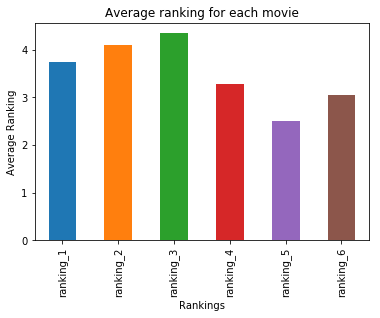

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

mean_ranking = star_wars.loc[:,'ranking_1':'ranking_6'].mean()
print(mean_ranking)

mean_ranking.plot.bar()
plt.title('Average ranking for each movie')
plt.ylabel('Average Ranking')
plt.xlabel('Rankings')

We can see how the best movie ranked by the respondents is the fifth one. In general, the first trilogy is better ranked than the second one.

#### Finding the most viewed movie
We will figure out how many people have seen each movie just by taking the sum of each column related with.

Text(0.5,0,'Seen columns by movie')

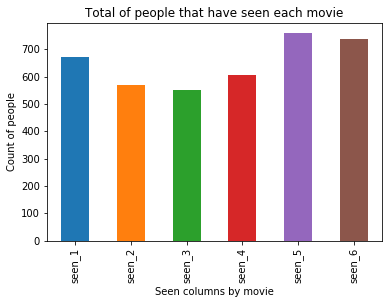

In [10]:
sum_seen_movies = star_wars[star_wars.columns[3:9]].sum()
sum_seen_movies.plot.bar()
plt.title('Total of people that have seen each movie')
plt.ylabel('Count of people')
plt.xlabel('Seen columns by movie')

The movies most seen are the the fifth and the sixth, which also were the ones best ranked.

### Exploring the data by gender segment
Let's examine how certain segments of the survey population responded. There are several columns that segment our data into two groups. Here are a few examples:

- Do you consider yourself to be a fan of the Star Wars film franchise? - True or False
- Do you consider yourself to be a fan of the Star Trek franchise? - Yes or No
- Gender - Male or Female

We can split a dataframe into two groups based on a binary column by creating two subsets of that column. We will split on the Gender column to compute the most viewed movie, the highest-ranked movie for each gender group.

Text(0.5,1,'Total of females that have seen each movie')

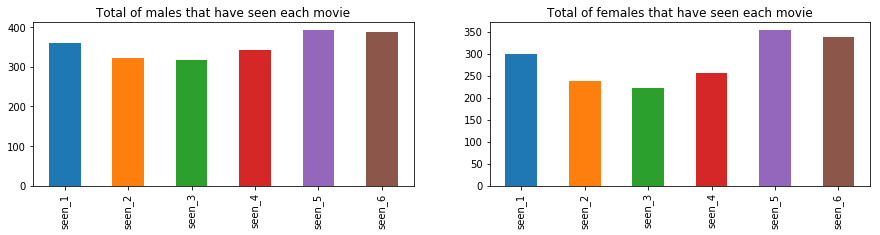

In [11]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

fig = plt.figure(figsize=(15, 3))
ax = fig.add_subplot(1,2,1)
males[males.columns[3:9]].sum().plot.bar(ax=ax)
ax.set_title('Total of males that have seen each movie')
ax = fig.add_subplot(1,2,2)
females[females.columns[3:9]].sum().plot.bar(ax=ax)
ax.set_title('Total of females that have seen each movie')


Text(0.5,1,'Movies ranked by females')

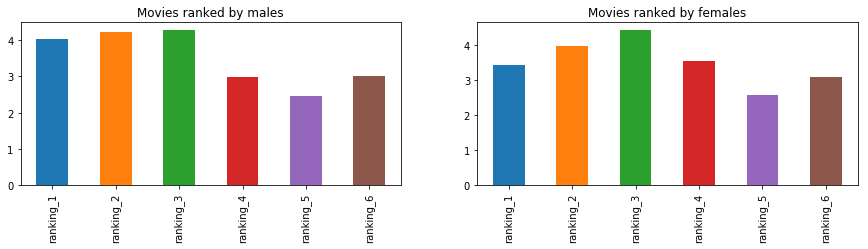

In [12]:
fig = plt.figure(figsize=(15, 3))
ax = fig.add_subplot(1,2,1)
males[males.columns[9:15]].mean().plot.bar(ax=ax)
ax.set_title('Movies ranked by males')
ax = fig.add_subplot(1,2,2)
females[females.columns[9:15]].mean().plot.bar(ax=ax)
ax.set_title('Movies ranked by females')

Males have seen all episodes more than females, where the difference is bigger in the episodes 1 to 3. However, they rated these episodes with worse rankings than females. The old movies are the most watched and best ranked for both gender.

## Conclusion

In this project, we explored the data from an exists survey from Star Wars fans using the online tool SurveyMonkey. We can reach that the episode 5 “The Empire Strikes Back” is the most seen and best ranked episode by most of the respondents. In general, the earlier movies seem to be more popular. 